# Data Analyst jobs visualization

I am temitope olanipekun,and this is my work book as regards this datatset.....

and end of this workbook,you would get some vital informations...

## About Dataset

This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

* Job Title.
* Salary Estimate.
* Company Name.
* Location.
* Industry.
* Sector.
* Rating
* Size.
* Revenue

In [1]:
#import neccesary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns




from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [3]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [4]:
 df11 = df.drop(columns = ['Unnamed: 0'])
df11.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 264.1+ KB


In [6]:
df11.nunique()

Job Title            1272
Salary Estimate        90
Job Description      2253
Rating                 37
Company Name         1513
Location              253
Headquarters          483
Size                    9
Founded               161
Type of ownership      15
Industry               89
Sector                 25
Revenue                14
Competitors           291
Easy Apply              2
dtype: int64

In [7]:
df11.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

replace -1,'-1' and -1.0  as np.nan (keyword none)

In [8]:
df11.replace(-1,np.nan,inplace = True)
df11.replace('-1',np.nan,inplace = True)
df11.replace(-1.0,np.nan,inplace = True)

* ### From the above output we can see that there are many missing values in the dataset. But we have only work with some columns like :
    1. Job Title.
    2. Salary Estimate.
    3. Company Name.
    4. Location.
    5. Industry.
    6. Sector.
    7. Rating
    8. Size.
    9. Revenue
    
    
    
* ### we will view infors about the columns

In [9]:
 df2 = df11.drop(columns = ['Competitors','Easy Apply'])
df2.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD)
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)


In [10]:
df2['Job Title'], df2['Department'] = df2['Job Title'].str.split(',', 1).str

C:\Users\user\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [11]:
df2['Job Title'].value_counts()[:20]

Data Analyst               443
Senior Data Analyst        105
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            26
Data Analyst II             20
Lead Data Analyst           19
Data Quality Analyst        18
Data Analyst Junior         17
Data Governance Analyst     16
Analyst                     14
Data Reporting Analyst      14
Financial Data Analyst      13
Data Analyst III            11
Data Analyst I              11
Senior Analyst              10
Marketing Data Analyst      10
Sr Data Analyst             10
Data Science Analyst         8
Data Management Analyst      8
Name: Job Title, dtype: int64

In [12]:
df2['Job Title'] = df2['Job Title'].replace(['Sr. Data Analyst', 'Sr Data Analyst'], 'Senior Data Analyst')

In [13]:
df2['Job Title'].value_counts()[:20]

Data Analyst               443
Senior Data Analyst        141
Junior Data Analyst         30
Business Data Analyst       28
Data Analyst II             20
Lead Data Analyst           19
Data Quality Analyst        18
Data Analyst Junior         17
Data Governance Analyst     16
Data Reporting Analyst      14
Analyst                     14
Financial Data Analyst      13
Data Analyst III            11
Data Analyst I              11
Marketing Data Analyst      10
Senior Analyst              10
Data Management Analyst      8
Data Warehouse Analyst       8
Data Science Analyst         8
Healthcare Data Analyst      7
Name: Job Title, dtype: int64

### Cleaning Salary Estimate column

In [14]:
df2['Salary Estimate']

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
2248    $78K-$104K (Glassdoor est.)
2249    $78K-$104K (Glassdoor est.)
2250    $78K-$104K (Glassdoor est.)
2251    $78K-$104K (Glassdoor est.)
2252    $78K-$104K (Glassdoor est.)
Name: Salary Estimate, Length: 2253, dtype: object

>  As we can see 'Salary Estimate' column need some cleaning by removing the glassdoor est. and spliting salary into 2 col( min and max ) columns

In [15]:
df2['Salary Estimate'],_ = df2['Salary Estimate'].str.split('(', 1).str
df2['Min Salary'], df2['Max Salary'] = df2['Salary Estimate'].str.split('-').str
df2.dropna(axis=0 , subset=['Max Salary'], inplace=True)

C:\Users\user\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [16]:
df2['Max Salary'] = df2['Max Salary'].str.extract('(\d+)')
df2['Min Salary'] = df2['Min Salary'].str.extract('(\d+)')

df2['Min Salary'] = df2['Min Salary'].astype(str).astype(int)
df2['Max Salary'] = df2['Max Salary'].astype(str).astype(int)

In [17]:
del df2['Salary Estimate']

### Cleaning 'Company Name' column

In [18]:
df2['Company Name'], temp = df2['Company Name'].str.split('\n', 1).str

C:\Users\user\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


### Cleaning 'Location' column

In [19]:
df2['Location'].value_counts()[:20]

New York, NY         310
Chicago, IL          130
San Francisco, CA    119
Austin, TX            81
Los Angeles, CA       80
Charlotte, NC         78
Houston, TX           72
Dallas, TX            66
San Diego, CA         62
Philadelphia, PA      56
Denver, CO            47
San Antonio, TX       45
San Jose, CA          38
Phoenix, AZ           35
Jersey City, NJ       33
Tempe, AZ             31
Seattle, WA           30
Columbus, OH          29
Irving, TX            29
Plano, TX             28
Name: Location, dtype: int64

* we are spliting the states and cities from 'Location' column

In [20]:
df2['City'], df2['State'] = df2['Location'].str.split(',', 1).str

C:\Users\user\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [21]:
df2['State'] = df2['State'].replace([' Arapahoe, CO'], ' CO')

In [22]:
df2['State'] = df2['State'].str.strip()
df2['City'] = df2['City'].str.strip()

In [23]:
df2['State'].value_counts()

CA    626
TX    394
NY    345
IL    164
PA    114
AZ     97
CO     96
NC     90
NJ     86
WA     53
VA     48
OH     35
UT     33
FL     27
IN     23
DE     11
GA      4
SC      3
KS      3
Name: State, dtype: int64

### Cleaning 'Industry' column**

In [24]:
df2['Industry'] = df2['Industry'].fillna('Others')

### Cleaning 'Sector' column

In [25]:
df2['Sector'] = df2['Sector'].fillna('Others')

### Cleaning 'Rating' column

In [26]:
df2['Rating'] = df2['Rating'].fillna(round(df2['Rating'].mean(), 1))

### Cleaning 'Revenue' column

FILTER THE REVENUE FUNCTION

In [27]:
def filter_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])
    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000
    return revenue

In [28]:
df2['Revenue'] = df2['Revenue'].apply(lambda x: filter_revenue(x))

In [29]:
new_col = ['Job Title', 'Rating', 'Company Name', 'State', 'City','Size', 'Industry', 'Sector', 'Min Salary', 'Max Salary', 'Revenue']

## Now we have got what we would be fully working with...YIPPEE

In [30]:
df2[new_col].head()

,Job Title,Rating,Company Name,State,City,Size,Industry,Sector,Min Salary,Max Salary,Revenue
0,Data Analyst,3.2,Vera Institute of Justice,NY,New York,201 to 500 employees,Social Assistance,Non-Profit,37,66,500.0
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,NY,New York,10000+ employees,Health Care Services & Hospitals,Health Care,37,66,5000.0
2,Senior Data Analyst,3.4,Squarespace,NY,New York,1001 to 5000 employees,Internet,Information Technology,37,66,0.0
3,Data Analyst,4.1,Celerity,NY,New York,201 to 500 employees,IT Services,Information Technology,37,66,100.0
4,Reporting Data Analyst,3.9,FanDuel,NY,New York,501 to 1000 employees,Sports & Recreation,"Arts, Entertainment & Recreation",37,66,500.0


In [31]:
top_20_job = pd.DataFrame(df2['Job Title'].value_counts()[:20]).reset_index()
top_20_job.rename(columns={'index': 'Job Title', 'Job Title': 'No. of Openings'}, inplace=True)

In [32]:
top_20_job = pd.DataFrame(df2['Job Title'].value_counts()[:20]).reset_index()
top_20_job.rename(columns={'index': 'Job Title', 'Job Title': 'No. of Openings'}, inplace=True)

In [33]:
top_20_job.head(20)

,Job Title,No. of Openings
0,Data Analyst,443
1,Senior Data Analyst,141
2,Junior Data Analyst,30
3,Business Data Analyst,28
4,Data Analyst II,20
5,Lead Data Analyst,19
6,Data Quality Analyst,18
7,Data Analyst Junior,17
8,Data Governance Analyst,16
9,Analyst,14


(20, 2)


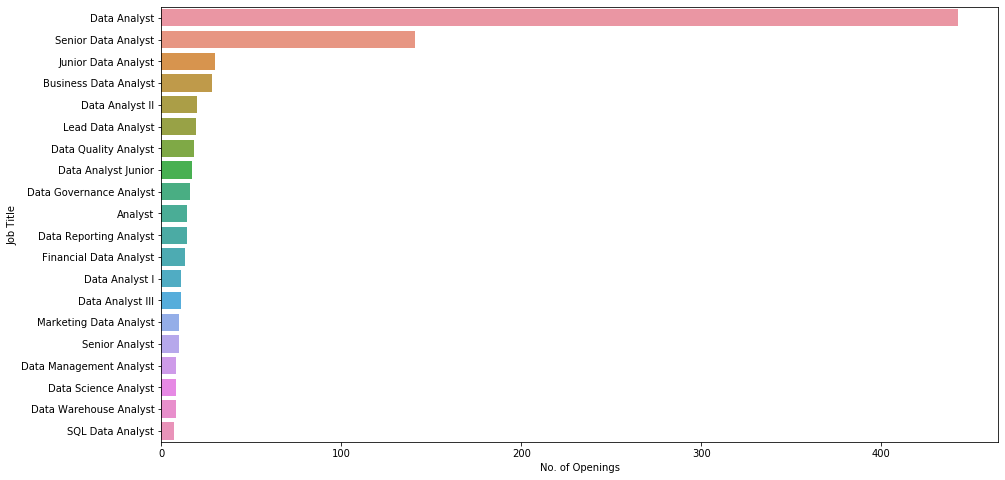

In [38]:
plt.figure(figsize=(15,8))
cop = top_20_job.copy()
cop.sort_values('No. of Openings',ascending=False)
print(cop.shape)
cop1 = cop.head(20).copy()
sns.barplot(y=cop1['Job Title'],x=cop1['No. of Openings'],orient='h')


NOW....ITS TIME FOR

FETCHING THE DATA BY JOB TITLE 

This is for those who which to choose whichever analyst role, to know the sectors that they will need to focus 

their job searches on.....

so the top 20 jobs and the sectors in whom they gain ground were shown below.... 

## Sql Data analyst

In [39]:

D9 = df2.loc[df2['Job Title'] == 'SQL Data Analyst']
D9.head() 

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Department,Min Salary,Max Salary,City,State
261,SQL Data Analyst,Job Title :Senior SQL Data Analyst\n\nNo of Op...,3.4,Siri InfoSolutions,"Summit, NJ","Edison, NJ",51 to 200 employees,NaN,Company - Private,Consulting,Business Services,25.0,NaN,73,127,Summit,NJ
1018,SQL Data Analyst,"Edupoint Educational Systems, a Leader in K-12...",3.3,Edupoint,"Mesa, AZ","Irvine, CA",1 to 50 employees,NaN,Company - Private,Enterprise Software & Network Solutions,Information Technology,1.0,NaN,46,102,Mesa,AZ
1075,SQL Data Analyst,Title: SQL Data Analyst\nDuration: 6+ Month Co...,3.9,Mondo,"Malvern, PA","New York, NY",51 to 200 employees,2000.0,Company - Private,Staffing & Outsourcing,Business Services,500.0,NaN,41,78,Malvern,PA
1116,SQL Data Analyst,Piper Companies is looking for an SQL Data Ana...,4.5,Piper Companies,"Horsham, PA","Mc Lean, VA",201 to 500 employees,2011.0,Company - Private,Staffing & Outsourcing,Business Services,0.0,NaN,38,68,Horsham,PA
1130,SQL Data Analyst,Piper Companies is looking for an SQL Data Ana...,3.9,"Zachary Piper Solutions, LLC","Horsham, PA","Mc Lean, VA",51 to 200 employees,2011.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,25.0,NaN,37,44,Horsham,PA


Text(0.5, 1.0, 'SQL Data Analyst count')

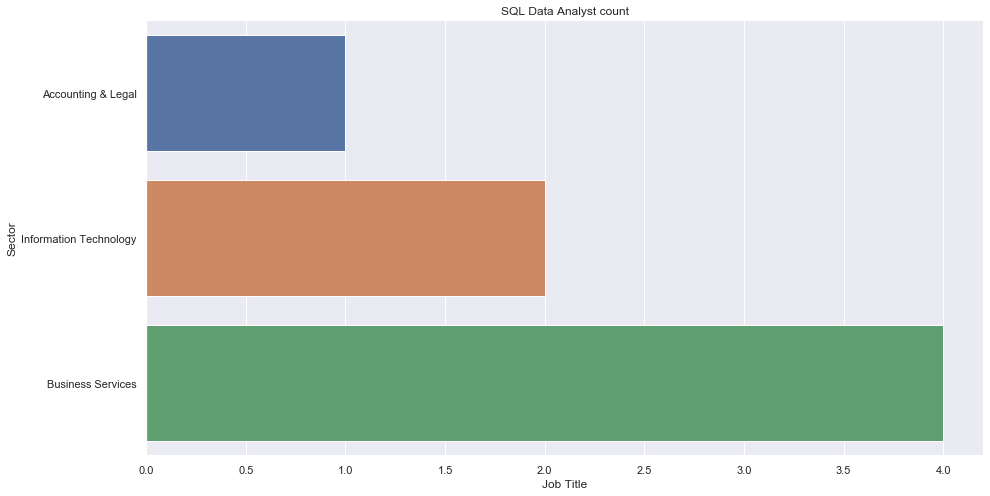

In [40]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = D9['Sector'].value_counts().sort_values(ascending=True)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Job Title')
plt.ylabel('Sector')
plt.title('SQL Data Analyst count')

## Data Management Analyst

In [42]:

D8 = df2.loc[df2['Job Title'] == 'Data Management Analyst']
D8.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Department,Min Salary,Max Salary,City,State
169,Data Management Analyst,The Data Management Analyst is responsible for...,2.5,Brooklyn Community Services,"Brooklyn, NY","Brooklyn, NY",201 to 500 employees,1886.0,Nonprofit Organization,Social Assistance,Non-Profit,50.0,NaN,43,76,Brooklyn,NY
190,Data Management Analyst,TSR is a premier National U.S. Staffing compan...,3.6,TSR Consulting,"New York, NY","Hauppauge, NY",201 to 500 employees,1969.0,Company - Public,Staffing & Outsourcing,Business Services,100.0,NaN,60,110,New York,NY
788,Data Management Analyst,Overview\n\nCIBC is a leading North American f...,3.2,"PrivateBancorp, Inc.","Chicago, IL","Chicago, IL",10000+ employees,NaN,Company - Public,Banks & Credit Unions,Finance,0.0,NaN,67,92,Chicago,IL
1388,Data Management Analyst,LEONARDO DRS (“DRS”) is a leading supplier of ...,4.7,Daylight Solutions,"Dallas, TX","San Diego, CA",51 to 200 employees,NaN,Company - Private,Aerospace & Defense,Aerospace & Defense,50.0,NaN,41,86,Dallas,TX
1397,Data Management Analyst,TrinityRail is searching for a passionate Data...,2.9,Trinity Industries,"Dallas, TX","Dallas, TX",10000+ employees,1933.0,Company - Public,Transportation Equipment Manufacturing,Manufacturing,10000.0,NaN,41,86,Dallas,TX


Text(0.5, 1.0, 'Data Management  Analyst count')

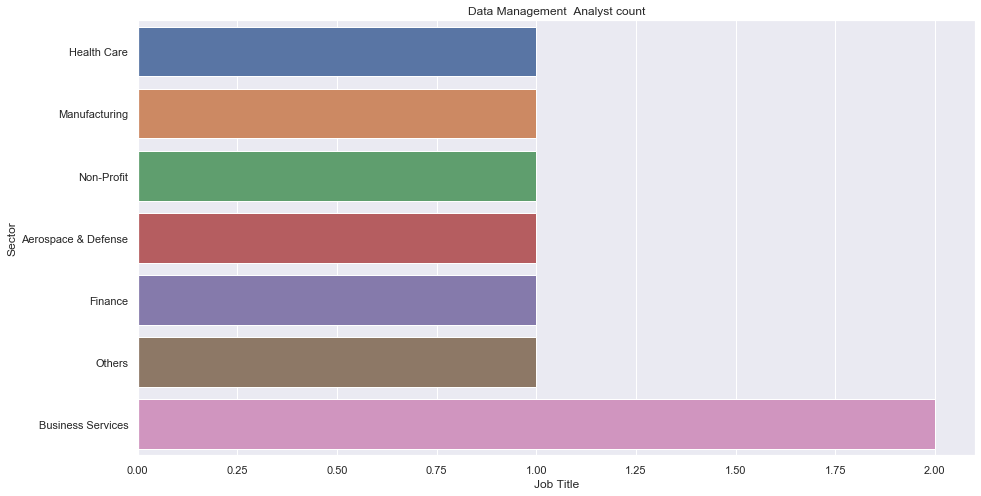

In [43]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = D8['Sector'].value_counts().sort_values(ascending=True)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Job Title')
plt.ylabel('Sector')
plt.title('Data Management  Analyst count')

## Data Science Analyst

In [45]:

D7 = df2.loc[df2['Job Title'] == 'Data Science Analyst']
D7.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Department,Min Salary,Max Salary,City,State
7,Data Science Analyst,Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914.0,Company - Private,Insurance Carriers,Insurance,500.0,NaN,37,66,New York,NY
21,Data Science Analyst,"Job Description\nOur client, a music streaming...",3.7,MUSIC & Entertainment,"New York, NY","Marina del Rey, CA",Unknown,NaN,Company - Public,Others,Others,0.0,NaN,37,66,New York,NY
33,Data Science Analyst,Who we are\n\nSoFi is a digital personal finan...,3.2,SoFi,"New York, NY","San Francisco, CA",1001 to 5000 employees,2011.0,Company - Private,Lending,Finance,0.0,Capital Markets,46,87,New York,NY
68,Data Science Analyst,Job Details\n\nLevel\n\nExperienced\n\nJob Loc...,3.7,Greater New York Mutual Insurance Companies (GNY),"New York, NY",NaN,NaN,NaN,NaN,Others,Others,0.0,NaN,51,88,New York,NY
459,Data Science Analyst,Must be a US Citizen who currently possesses a...,2.7,Collins Consulting Inc,"Norfolk, VA","Schaumburg, IL",201 to 500 employees,1992.0,Company - Private,Consulting,Business Services,50.0,NaN,43,69,Norfolk,VA


Text(0.5, 1.0, 'Data Science  Analyst count')

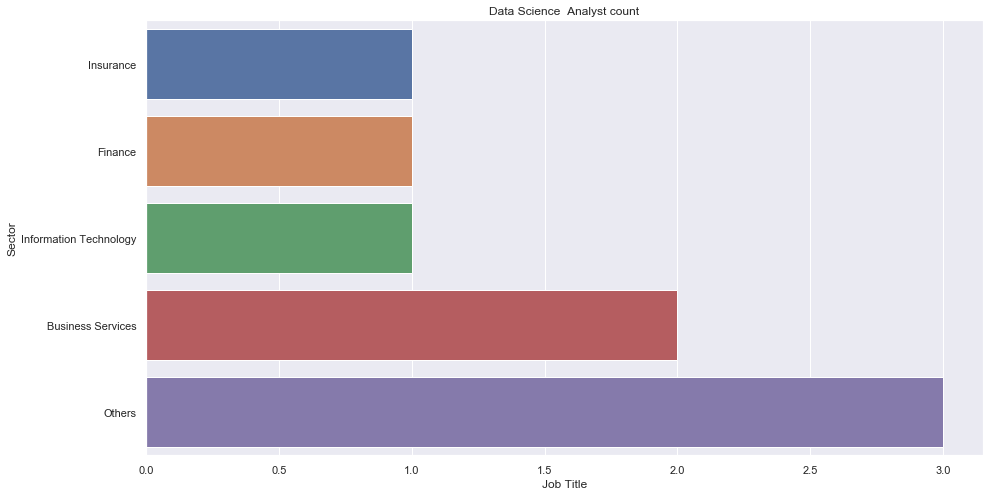

In [46]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = D7['Sector'].value_counts().sort_values(ascending=True)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Job Title')
plt.ylabel('Sector')
plt.title('Data Science  Analyst count')

## Data warehouse analyst

In [48]:

D6 = df2.loc[df2['Job Title'] == 'Data Warehouse Analyst']
D6.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Department,Min Salary,Max Salary,City,State
236,Data Warehouse Analyst,Please note that this role will be Remote unti...,3.7,SIAL TECHNOLOGY PARTNERS,"New York, NY","Princeton, NJ",1 to 50 employees,NaN,Company - Private,Others,Others,0.0,NaN,41,78,New York,NY
924,Data Warehouse Analyst,"Job Description\nLocation: Houston, TX\nDurati...",3.0,G.A.S. Global,"Houston, TX","Sugar Land, TX",10000+ employees,1970.0,Company - Private,Consulting,Business Services,500.0,NaN,47,76,Houston,TX
925,Data Warehouse Analyst,Job description:\nWorking within IT to transla...,5.0,Purity Technology LLC,"Houston, TX","Cypress, TX",1 to 50 employees,NaN,Company - Private,Others,Others,0.0,NaN,47,76,Houston,TX
927,Data Warehouse Analyst,"Description Design, develop, test, maintain, a...",3.5,Robert Half,"Houston, TX","Menlo Park, CA",10000+ employees,1948.0,Company - Public,Staffing & Outsourcing,Business Services,5000.0,NaN,47,76,Houston,TX
935,Data Warehouse Analyst,"Hi ,Â\n\nThis is SmithÂfrom Yochana Solutions;...",2.9,Yochana,"Houston, TX","Farmington Hills, MI",201 to 500 employees,2009.0,Company - Private,Staffing & Outsourcing,Business Services,100.0,NaN,47,76,Houston,TX


Text(0.5, 1.0, 'Data Warehouse  Analyst count')

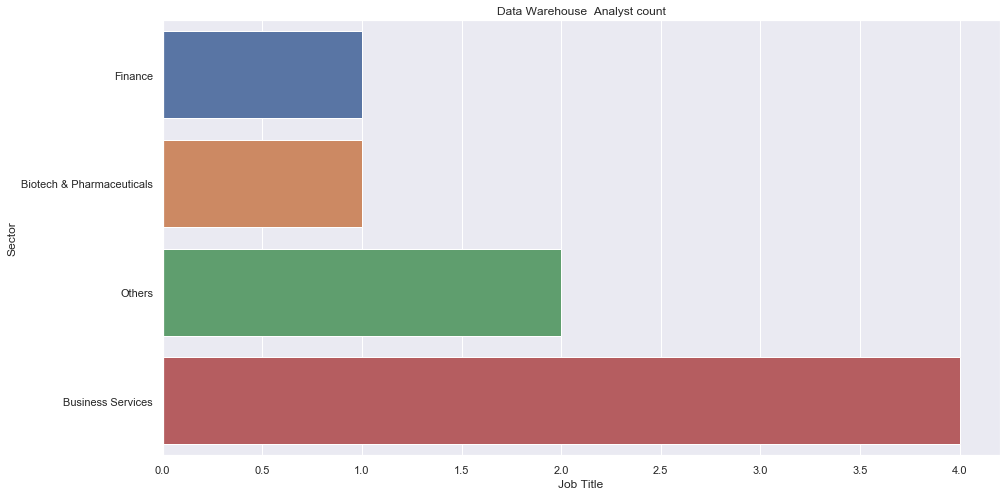

In [49]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = D6['Sector'].value_counts().sort_values(ascending=True)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Job Title')
plt.ylabel('Sector')
plt.title('Data Warehouse  Analyst count')

## Marketing data analyst

In [51]:

D5 = df2.loc[df2['Job Title'] == 'Marketing Data Analyst']
D5.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Department,Min Salary,Max Salary,City,State
72,Marketing Data Analyst,Marketing Data Analyst\n\nWe are a leading U.S...,3.6,Current,"New York, NY","Colorado Springs, CO",201 to 500 employees,NaN,Company - Public,Others,Others,0.0,NaN,51,88,New York,NY
572,Marketing Data Analyst,"Scale is a tech-driven,direct-to-consumer plat...",5.0,Scale Media,"Los Angeles, CA","Sherman Oaks, CA",1 to 50 employees,NaN,Company - Public,Advertising & Marketing,Business Services,0.0,NaN,57,103,Los Angeles,CA
620,Marketing Data Analyst,As part of the Marketing team you will be a ke...,3.6,The Wonderful Company LLC,"Los Angeles, CA","Los Angeles, CA",5001 to 10000 employees,1980.0,Company - Private,Consumer Products Manufacturing,Manufacturing,5000.0,Teleflora,35,45,Los Angeles,CA
766,Marketing Data Analyst,We are looking for responsible Marketing Data ...,3.7,Show Me Leads,"Chicago, IL",NaN,NaN,NaN,NaN,Others,Others,0.0,NaN,73,82,Chicago,IL
1020,Marketing Data Analyst,Overview\n\n\nAs a key member of the Analytics...,3.5,Efinancial,"Tempe, AZ","Bellevue, WA",201 to 500 employees,2001.0,Company - Private,Insurance Agencies & Brokerages,Insurance,100.0,NaN,46,102,Tempe,AZ


Text(0.5, 1.0, 'Marketing Data  Analyst count')

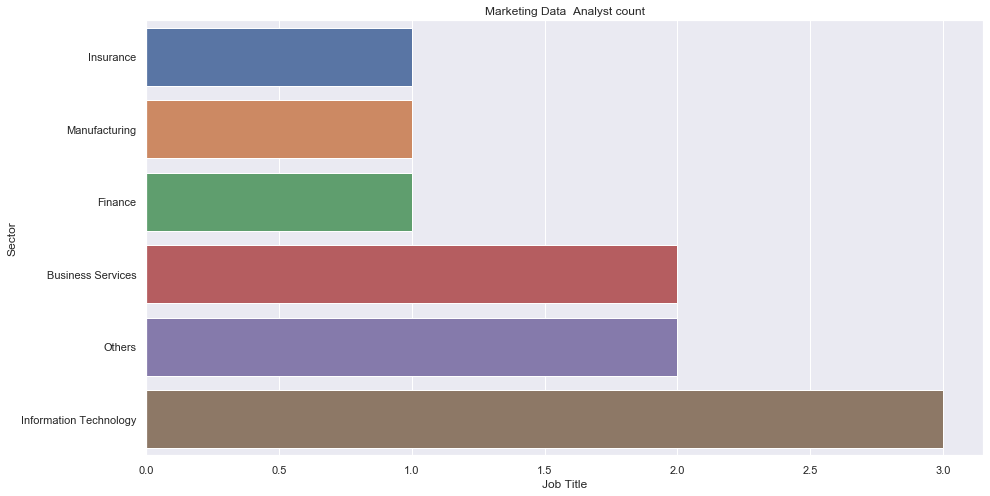

In [52]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = D5['Sector'].value_counts().sort_values(ascending=True)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Job Title')
plt.ylabel('Sector')
plt.title('Marketing Data  Analyst count')

## Data Governance analyst

In [53]:

D4 = df2.loc[df2['Job Title'] == 'Data Governance Analyst']
D4.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Department,Min Salary,Max Salary,City,State
146,Data Governance Analyst,Project Overview\n\nThe Enterprise Data Govern...,5.0,Crossfire Consulting Corporation,"New York, NY","Yorktown Heights, NY",51 to 200 employees,NaN,Company - Private,Consulting,Business Services,10.0,NaN,59,85,New York,NY
191,Data Governance Analyst,United States - New Jersey\nBusiness managemen...,3.6,UBS,"Weehawken, NJ","Zurich, Switzerland",10000+ employees,1862.0,Company - Public,Investment Banking & Asset Management,Finance,10000.0,NaN,60,110,Weehawken,NJ
204,Data Governance Analyst,"Software Guidance & Assistance, Inc., (SGA), i...",3.7,SGA Inc.,"New York, NY","Bethesda, MD",1 to 50 employees,1996.0,Company - Private,Architectural & Engineering Services,Business Services,5.0,NaN,60,110,New York,NY
224,Data Governance Analyst,Data Governance Analyst\n\nJob Number: 20-0538...,3.4,Eclaro,"New York, NY","New York, NY",501 to 1000 employees,1999.0,Company - Private,Staffing & Outsourcing,Business Services,50.0,NaN,41,78,New York,NY
273,Data Governance Analyst,Job Title: Data Governance Analyst\nLocation: ...,3.8,LanceSoft Inc,"New York, NY","Herndon, VA",1001 to 5000 employees,2000.0,Company - Private,Staffing & Outsourcing,Business Services,500.0,NaN,84,90,New York,NY


Text(0.5, 1.0, 'Data Governance Analyst count')

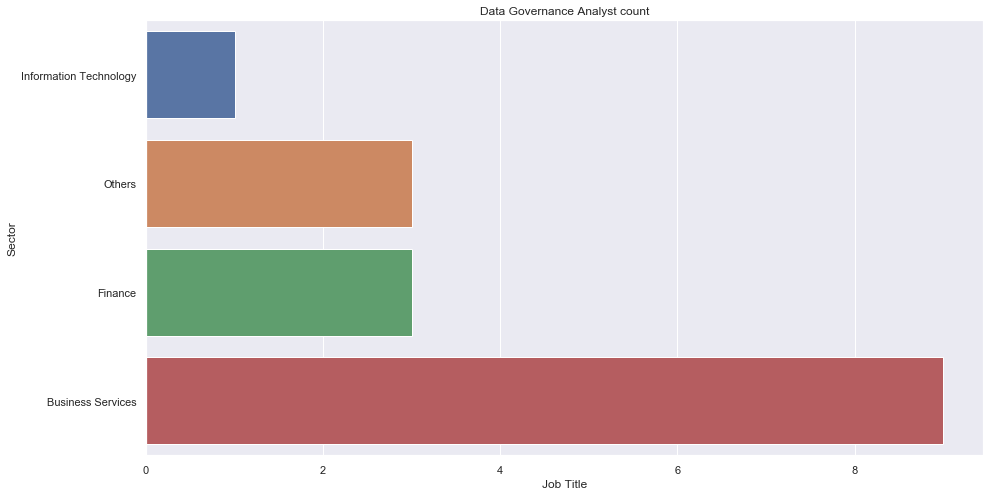

In [54]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = D4['Sector'].value_counts().sort_values(ascending=True)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Job Title')
plt.ylabel('Sector')
plt.title('Data Governance Analyst count')

## Business data analyst

In [56]:

D3 = df2.loc[df2['Job Title'] == 'Business Data Analyst']
D3.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Department,Min Salary,Max Salary,City,State
52,Business Data Analyst,"Summary Data Analysis, Financial Products basi...",3.7,Xoriant Corporation,"Jersey City, NJ","Sunnyvale, CA",1001 to 5000 employees,1990.0,Company - Private,IT Services,Information Technology,500.0,NaN,46,87,Jersey City,NJ
74,Business Data Analyst,"""This role is currently work-from-home and wil...",3.6,Axelon Services Corporation,"New York, NY","New York, NY",501 to 1000 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,500.0,NaN,51,88,New York,NY
97,Business Data Analyst,Job Description\nCortex is a premier staffing ...,3.8,Cortex consultants LLC,"New York, NY","North Brunswick, NJ",501 to 1000 employees,NaN,Company - Private,Consulting,Business Services,0.0,NaN,51,87,New York,NY
593,Business Data Analyst,Business Data Analyst at an established compan...,5.0,Connect International,"Los Angeles, CA","West Roxbury, MA",1 to 50 employees,NaN,Nonprofit Organization,Others,Others,0.0,NaN,57,103,Los Angeles,CA
594,Business Data Analyst,PUBG Corp. is the developer and publisher of t...,4.5,PUBG Santa Monica,"Los Angeles, CA","Seoul, South Korea",501 to 1000 employees,2017.0,Company - Private,Video Games,Media,0.0,NaN,57,103,Los Angeles,CA


Text(0.5, 1.0, 'Business Analyst count')

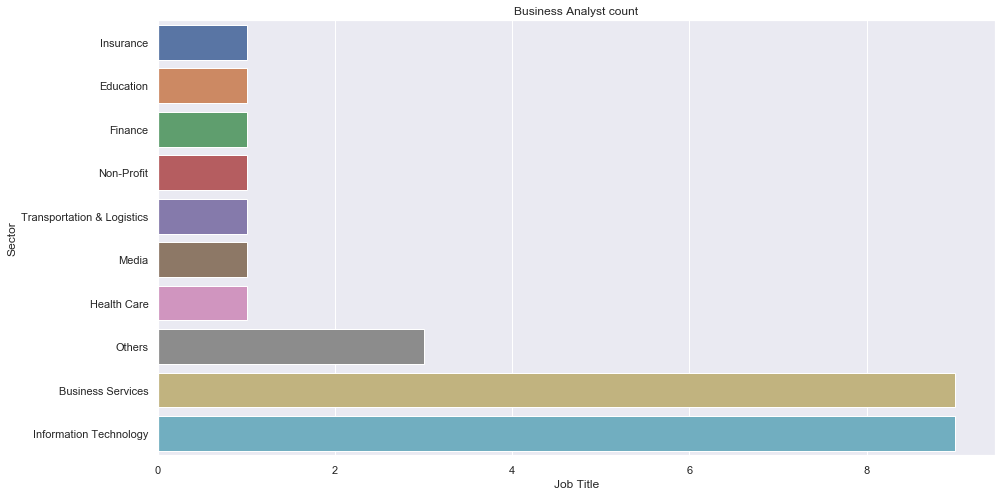

In [57]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = D3['Sector'].value_counts().sort_values(ascending=True)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Job Title')
plt.ylabel('Sector')
plt.title('Business Analyst count')

 ## Data analyst

In [58]:

DA = df2.loc[df2['Job Title'] == 'Data Analyst']
DA.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Department,Min Salary,Max Salary,City,State
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,500.0,Center on Immigration and Justice (CIJ),37,66,New York,NY
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,100.0,NaN,37,66,New York,NY
5,Data Analyst,About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,"New York, NY","Stamford, CT",1001 to 5000 employees,2014.0,Company - Private,Investment Banking & Asset Management,Finance,0.0,NaN,37,66,New York,NY
8,Data Analyst,The Data Analyst is an integral member of the ...,4.0,DMGT,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896.0,Company - Public,Venture Capital & Private Equity,Finance,2000.0,NaN,37,66,New York,NY
9,Data Analyst,About Us\n\nRiskified is the AI platform power...,4.4,Riskified,"New York, NY","New York, NY",501 to 1000 employees,2013.0,Company - Private,Research & Development,Business Services,0.0,Merchant Health,37,66,New York,NY


Text(0.5, 1.0, 'Data Analyst count')

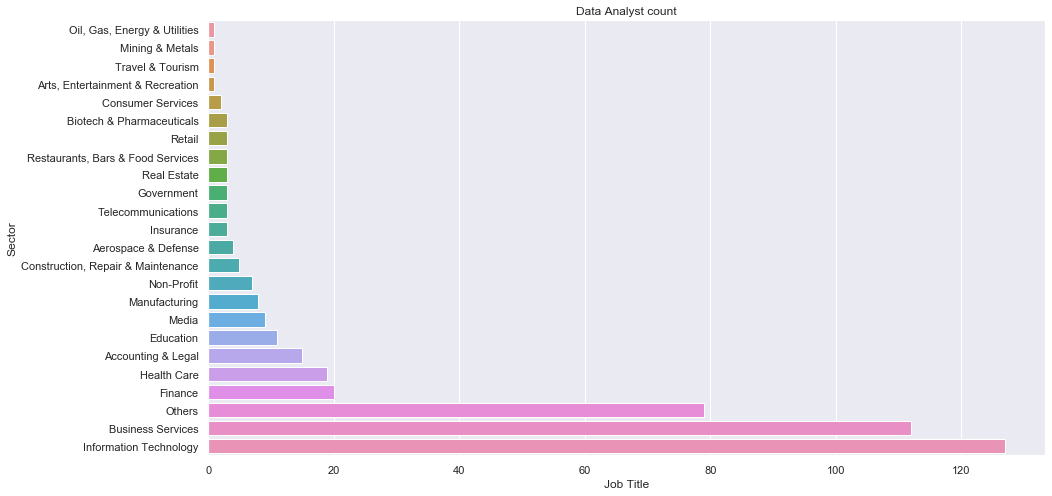

In [59]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = DA['Sector'].value_counts().sort_values(ascending=True)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Job Title')
plt.ylabel('Sector')
plt.title('Data Analyst count')

## Quality data analyst

In [60]:

DAA = df2.loc[df2['Job Title'] == 'Quality Data Analyst']
DAA.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Department,Min Salary,Max Salary,City,State
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,5000.0,NaN,37,66,New York,NY
434,Quality Data Analyst,"Quality Data AnalystEaston Technical Products,...",2.6,Easton Technical Products,"Salt Lake City, UT","Salt Lake City, UT",201 to 500 employees,NaN,Company - Private,Consumer Products Manufacturing,Manufacturing,100.0,NaN,26,47,Salt Lake City,UT
1826,Quality Data Analyst,"At OrthoCarolina, our team is our greatest ass...",3.6,OrthoCarolina,"Charlotte, NC","Charlotte, NC",501 to 1000 employees,2005.0,Company - Private,Health Care Services & Hospitals,Health Care,500.0,NaN,54,75,Charlotte,NC
2087,Quality Data Analyst,YOUR ROLE\nThe Quality Analyst will be respons...,3.5,Kuehne + Nagel,"Whitestown, IN","Feusisberg, Switzerland",10000+ employees,1890.0,Company - Private,Logistics & Supply Chain,Transportation & Logistics,10000.0,NaN,34,61,Whitestown,IN


Text(0.5, 1.0, 'Quality Data Analyst count')

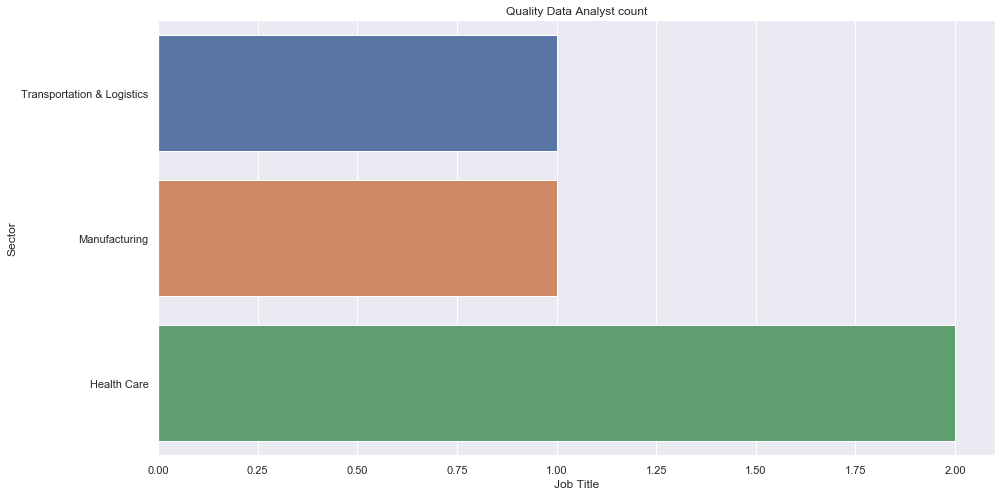

In [61]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = DAA['Sector'].value_counts().sort_values(ascending=True)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Job Title')
plt.ylabel('Sector')
plt.title('Quality Data Analyst count')

## Reporting data analyst

In [62]:

DA2 = df2.loc[df2['Job Title'] == 'Reporting Data Analyst']
DA2.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Department,Min Salary,Max Salary,City,State
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",500.0,NaN,37,66,New York,NY
585,Reporting Data Analyst,Job Description:\nPrepare and maintain existin...,4.5,Century Group (CA),"El Segundo, CA","El Segundo, CA",51 to 200 employees,1989.0,Company - Private,Staffing & Outsourcing,Business Services,0.0,NaN,57,103,El Segundo,CA
671,Reporting Data Analyst,Reporting Data Analyst\n\n\nEl Segundo\n\nPosi...,3.0,Apollo Global Management,"El Segundo, CA","New York, NY",1001 to 5000 employees,1990.0,Company - Public,Venture Capital & Private Equity,Finance,2000.0,NaN,65,81,El Segundo,CA


Text(0.5, 1.0, 'Reporting Data Analyst count')

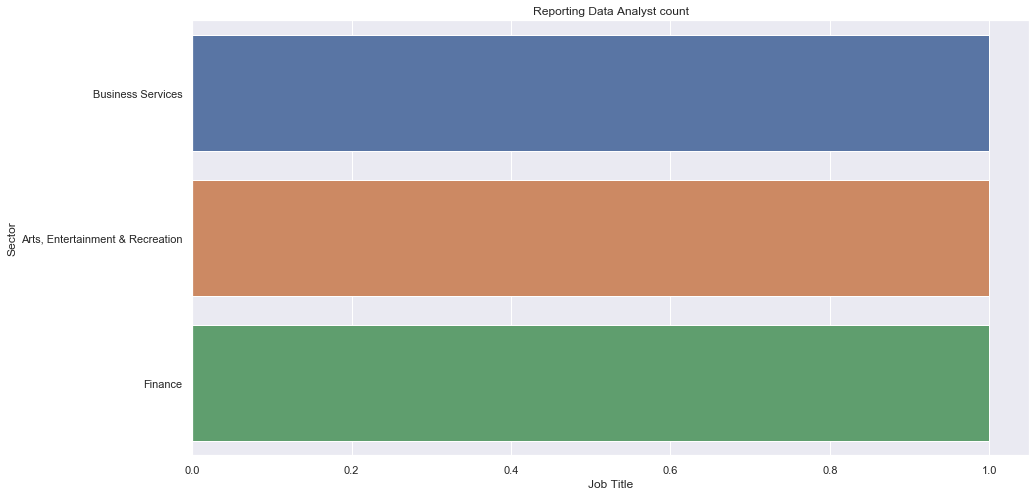

In [63]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = DA2['Sector'].value_counts().sort_values(ascending=True)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Job Title')
plt.ylabel('Sector')
plt.title('Reporting Data Analyst count')

## Senior data analyst

In [64]:

D22 = df2.loc[df2['Job Title'] == 'Senior Data Analyst']
D22.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Department,Min Salary,Max Salary,City,State
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,0.0,Insights & Analytics Team [Customer Operations],37,66,New York,NY
13,Senior Data Analyst,About Known\n\nKnown is a modern marketing com...,3.0,Known,"New York, NY","New York, NY",201 to 500 employees,2004.0,Company - Private,Advertising & Marketing,Business Services,500.0,NaN,37,66,New York,NY
50,Senior Data Analyst,Job Summary:Comprised of Disney's internationa...,4.0,Walt Disney Co.,"New York, NY","Burbank, CA",10000+ employees,1923.0,Company - Public,Motion Picture Production & Distribution,Media,10000.0,Disney+,46,87,New York,NY
53,Senior Data Analyst,Help us Build the Future of Money\n\nGemini Tr...,3.6,Gemini,"New York, NY","New York, NY",51 to 200 employees,2015.0,Company - Private,Brokerage Services,Finance,0.0,NaN,46,87,New York,NY
136,Senior Data Analyst,"At Rockstar Games, we create the games we woul...",4.1,Rockstar Games,"New York, NY","New York, NY",1001 to 5000 employees,1998.0,Subsidiary or Business Segment,Video Games,Media,25.0,NaN,59,85,New York,NY


Text(0.5, 1.0, 'Senior Data Analyst count')

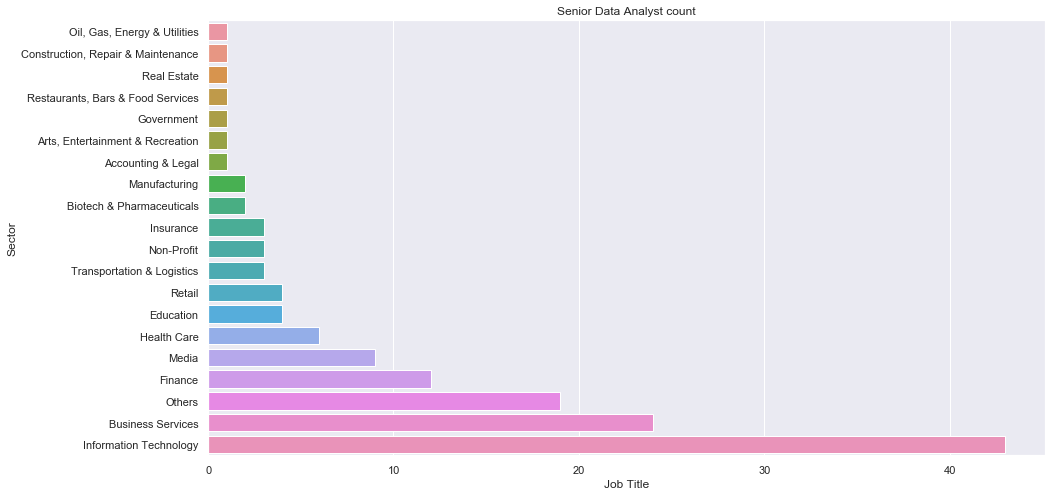

In [65]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = D22['Sector'].value_counts().sort_values(ascending=True)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Job Title')
plt.ylabel('Sector')
plt.title('Senior Data Analyst count')

In [66]:
df2.describe()

,Rating,Founded,Revenue,Min Salary,Max Salary
count,2252.000000,1592.000000,2252.000000,2252.000000,2252.000000
mean,3.727753,1978.348618,1548.409414,54.266874,89.979130
std,0.628614,47.833946,3183.247155,19.575375,29.315605
min,1.000000,1682.000000,0.000000,24.000000,38.000000
25%,3.400000,1970.000000,0.000000,41.000000,70.000000
50%,3.700000,1997.000000,25.000000,50.000000,87.000000
75%,4.000000,2006.000000,500.000000,64.000000,104.000000
max,5.000000,2019.000000,10000.000000,113.000000,190.000000


## i feel  it's time to visualize.,so we can see  things properly

This industries are the top 20 with most number of jobs....

In [67]:
top_20_industry = pd.DataFrame(df['Industry'].value_counts()[1:21]).reset_index()
top_20_industry.rename(columns={'index': 'Industry', 'Industry': 'No. of Openings'}, inplace=True)

In [68]:
top_20_industry.head(20)

,Industry,No. of Openings
0,IT Services,325
1,Staffing & Outsourcing,323
2,Health Care Services & Hospitals,151
3,Computer Hardware & Software,111
4,Consulting,111
5,Investment Banking & Asset Management,78
6,Enterprise Software & Network Solutions,69
7,Internet,65
8,Banks & Credit Unions,51
9,Advertising & Marketing,51


(20, 2)


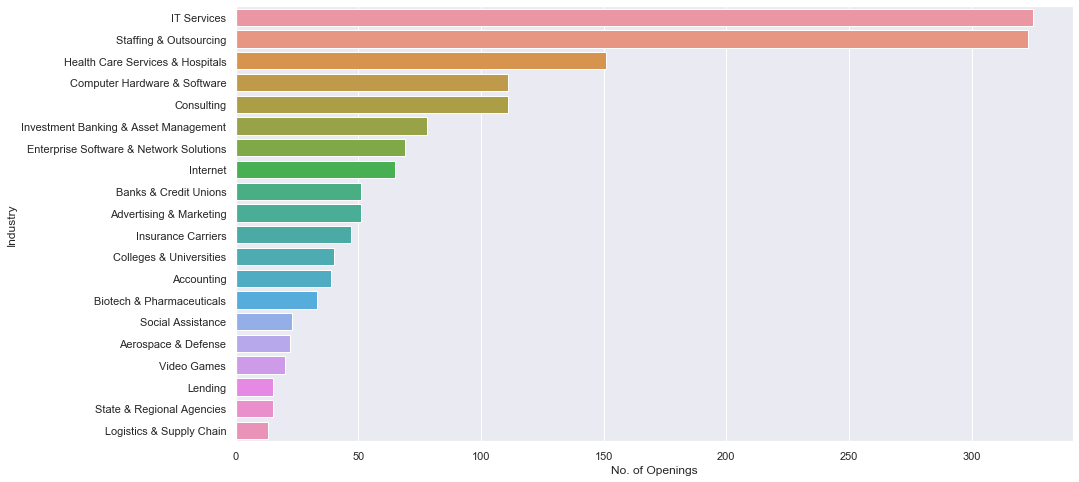

In [77]:
plt.figure(figsize=(15,8))
cop = top_20_industry.copy()
cop.sort_values('No. of Openings',ascending=False)
print(cop.shape)
cop1 = cop.head(20).copy()
sns.barplot(y=cop1['Industry'],x=cop1['No. of Openings'],orient='h')


this are job offerings in different cities.....

In [69]:
top_20_city = pd.DataFrame(df2['City'].value_counts()[:20]).reset_index()
top_20_city.rename(columns={'index':'City', 'City':'No. of Openings'}, inplace=True)

In [70]:
top_20_city.head(20)

,City,No. of Openings
0,New York,310
1,Chicago,130
2,San Francisco,119
3,Austin,81
4,Los Angeles,80
5,Charlotte,78
6,Houston,72
7,Dallas,66
8,San Diego,62
9,Philadelphia,56


(20, 2)


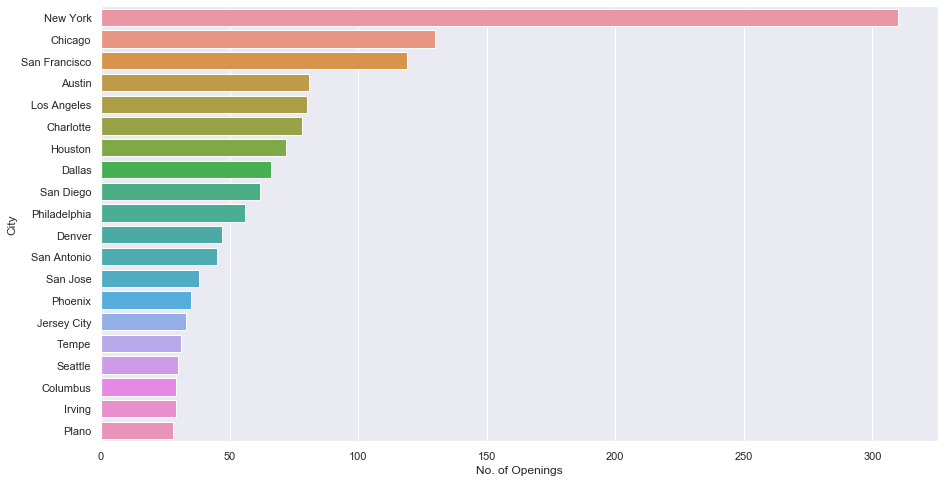

In [79]:
plt.figure(figsize=(15,8))
cop = top_20_city.copy()
cop.sort_values('No. of Openings',ascending=False)
print(cop.shape)
cop1 = cop.head(20).copy()
sns.barplot(y=cop1['City'],x=cop1['No. of Openings'],orient='h')


* top Jobs with their  min and max salary

In [71]:
df2.dropna(axis=0 , subset=['Max Salary','Min Salary'], inplace=True)

In [72]:
grp_job_title = df2[['Job Title','Min Salary', 'Max Salary']].groupby('Job Title').mean().reset_index()
grp_job_title = grp_job_title[grp_job_title['Job Title'].isin(top_20_job['Job Title'].values)].reset_index()
del grp_job_title['index']#deleting the index


In [73]:
grp_job_title['Min Salary'] = grp_job_title['Min Salary'].round(1)#rounding it off to 1 decimal place
grp_job_title['Max Salary'] = grp_job_title['Max Salary'].round(1)

In [75]:
grp_job_title['Min Salary'].head()

0    54.6
1    56.3
2    54.3
3    56.0
4    45.7
Name: Min Salary, dtype: float64

In [76]:

grp_job_title['Max Salary'].head()

0    81.9
1    94.9
2    91.0
3    95.5
4    82.0
Name: Max Salary, dtype: float64

(20, 3)


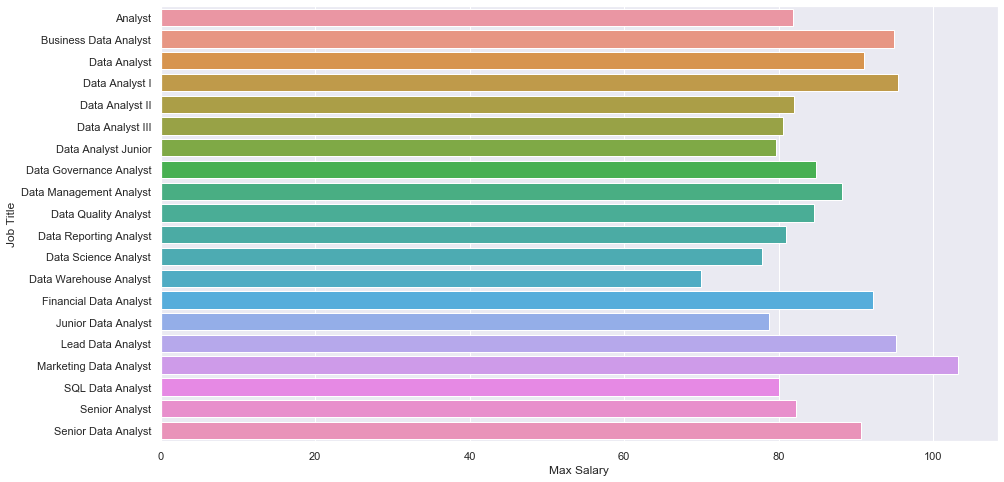

In [86]:
plt.figure(figsize=(15,8))
cop = grp_job_title.copy()
cop.sort_values('Max Salary',ascending=True)
print(cop.shape)
cop1 = cop.head(20).copy()
sns.barplot(y=cop1['Job Title'],x=cop1['Max Salary'],orient='h')


(20, 3)


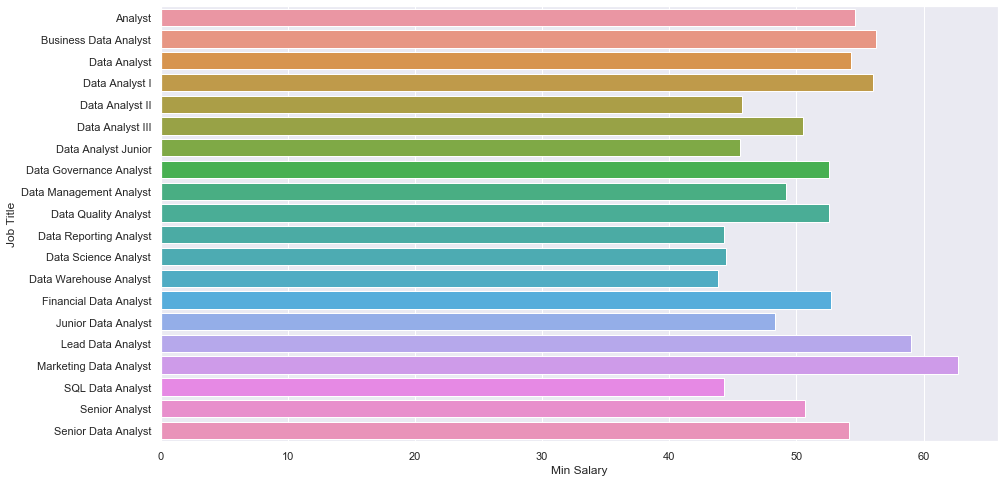

In [83]:
plt.figure(figsize=(15,8))
cop = grp_job_title.copy()
cop.sort_values('Min Salary',ascending=True)
print(cop.shape)
cop1 = cop.head(20).copy()
sns.barplot(y=cop1['Job Title'],x=cop1['Min Salary'],orient='h')


## WE ARE HERE


so, i have succeded in bringing my analysis as regards the data analyst  DATASET to a close with the purpose of 

showing you that i accomplished cleaning the dataset and preparing for the major outcomes of knowledge

for us to know which jobs are perfect at this time of the pandemic,and which jobs are available both

in the states,companies and how good the salary is.....

i brought out this points



1.TOP 20 JOB positions with their  respective openings :This was shown for the purpose of analysts who needs to 
    
    know the number of openings and how much opportunity exists for them

2.Got the job positions with which sector they really dominate:This shoowed sectors where the top

20  analysts tends to dominate and it will tune their motives to knowing how to focus on the right sector

3.TOP 20 industries with the respective openings

4.TOP 20 CITIES with their respective openings:it shows cities were jobs for analyst are available in the USA..
    
5.JOBS having Min and Max salary....


AND  every of the above findings has a visualization attached to it....


pls feel free to check the work book properly and you can comment about it...


I am temitope olanipekun....

your favourite statistician,data analyst,data scientist,machine learning expert and tableau expert.


## SEE YOU IN MY NEXT WORKBOOK